# 과제: CIFAR10 데이터셋을 이용하여 MLP 모델 만들고 훈련시키기
다른 데이터셋을 이용하여 스스로 MLP를 구성하고 훈련해 보자. <br>
10개의 서로 다른 class를 가진 CIFAR10 데이터셋을 이용하여 비슷하게 MLP 모델을 만들고 훈련하여 제출하시오. <br>
모델은 최소한 3개 이상의 Dense layer를 사용하여 구성하여야 하고 0.4 이상의 Validation accuracy를 달성할 때까지 훈련을 진행하시오. 또한 Regularizer를 한번 이상 활용하시오.(Dropout 제외) <br>
*주의*: Fashion MNIST와 CIFAR10은 Input의 shape가 다르므로 이를 잘 고려해야 한다.

HW1_학번_이름.ipynb 형태로 저장하여 Jupyter Notebook을 그대로 제출! <br>
(예: HW1_2020_12345_keondo.ipynb) <br>
훈련을 진행하고 Output을 지우지 말고 제출할 것!

In [5]:
import tensorflow as tf
cifar10 = tf.keras.datasets.cifar10

#Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Split train set into train/valid set
from sklearn import model_selection
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x_train, y_train,test_size=0.2, random_state=42)

#Rescale data to be in the range of [0,1]
x_train, x_valid, x_test = x_train / 255.0, x_valid / 255.0, x_test / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

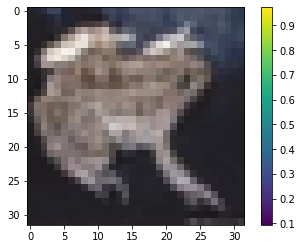

In [6]:
import matplotlib.pyplot as plt
#Let's look at the sample data
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
y_train

array([[6],
       [2],
       [5],
       ...,
       [8],
       [8],
       [8]], dtype=uint8)

In [34]:
from tensorflow.keras.regularizers import l2

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(256, activation='relu', bias_regularizer=l2(0.01), kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dense(256, activation='relu', bias_regularizer=l2(0.01), kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(10,activation='softmax'),
])

loss_ft = tf.keras.losses.SparseCategoricalCrossentropy()
optim_ft = tf.keras.optimizers.Adam()

model.compile(loss=loss_ft, optimizer=optim_ft, metrics=['accuracy'])

In [35]:
import os

#학습률을 점점 줄이기 위한 함수
def decay(epoch):
    if epoch < 3:
        return 1e-3
    elif epoch >=3 and epoch < 7:
        return 1e-4
    else:
        return 1e-5
    
#Custom Callback : Learning rate를 각 epoch 마다 print하는 callback함수 설정
class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None): 
        print("\n Epoch {}'s Learning rate is {}".format(epoch + 1, model.optimizer.lr.numpy()))

callbacks = [

    tf.keras.callbacks.LearningRateScheduler(decay),
    PrintLR()
]

In [36]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 3072)              0         
                                                                 
 dense_30 (Dense)            (None, 256)               786688    
                                                                 
 dense_31 (Dense)            (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_32 (Dense)            (None, 128)               32896     
                                                                 
 dense_33 (Dense)            (None, 10)                1290      
                                                                 
Total params: 886,666
Trainable params: 886,666
Non-tr

In [37]:
hist = model.fit(x_train,y_train, epochs=30, validation_data = (x_valid, y_valid), callbacks=callbacks)

Epoch 1/30
1250/1250 [==============================] - ETA: 0s - loss: 2.4894 - accuracy: 0.2930
 Epoch 1's Learning rate is 0.0010000000474974513
1250/1250 [==============================] - 4s 3ms/step - loss: 2.4894 - accuracy: 0.2930 - val_loss: 1.9693 - val_accuracy: 0.3398 - lr: 0.0010
Epoch 2/30
1242/1250 [============================>.] - ETA: 0s - loss: 2.0038 - accuracy: 0.3341
 Epoch 2's Learning rate is 0.0010000000474974513
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0034 - accuracy: 0.3343 - val_loss: 1.9697 - val_accuracy: 0.3421 - lr: 0.0010
Epoch 3/30
1240/1250 [============================>.] - ETA: 0s - loss: 2.0054 - accuracy: 0.3420
 Epoch 3's Learning rate is 0.0010000000474974513
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0055 - accuracy: 0.3420 - val_loss: 2.0573 - val_accuracy: 0.3331 - lr: 0.0010
Epoch 4/30
1232/1250 [============================>.] - ETA: 0s - loss: 1.8248 - accuracy: 0.3883
 Epoch 4's Learning 

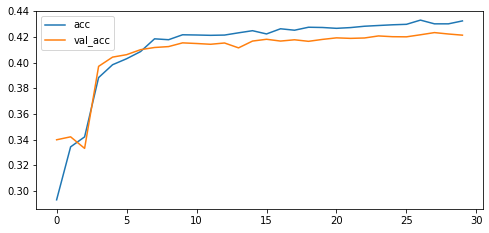

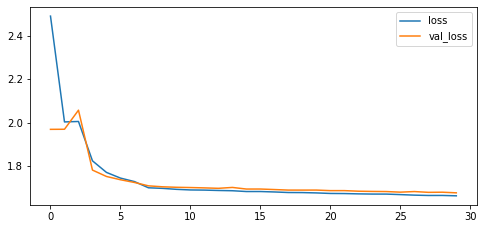

In [41]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(acc, label='acc')
plt.plot(val_acc ,label = 'val_acc')
plt.legend()

plt.figure(figsize=(8,8))
plt.subplot(2,1,2)
plt.plot(loss, label='loss')
plt.plot(val_loss ,label = 'val_loss')
plt.legend()
plt.show()

In [42]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 1.6651 - accuracy: 0.4282 - 685ms/epoch - 2ms/step


[1.6651207208633423, 0.42820000648498535]